In [12]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TN1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TN1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TN1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [14]:
myfile = open('20th_century.txt', encoding='utf-8') 

In [15]:
# Import txt file

with open('20th_century.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [123]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
tokenized_sent[0:100]

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.

In [125]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
tokenized_word [0:100]

['Key',
 'events',
 'of',
 'the',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'to',
 'contentMain',
 'menuMain',
 'menumove',
 'to',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'to',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonate',
 'Create',
 'account',
 'Log',
 'in',
 'Pages',
 'for',
 'logged',
 'out',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'to',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 'in',
 'the',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 'in',
 'the',
 '20th',
 'century',
 'subsection1.1World',
 'at',
 'the',
 'beginning',
 'of',
 'the',
 'century1.1.1',
 "''",
 'The',
 'war',
 'to',
 'end',
 'all',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2Russian',
 'Revolution',
 'and',
 '

In [18]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4800 samples and 21039 outcomes>


In [19]:
dist_words.most_common(10)

[('.', 1267),
 ('the', 1106),
 (',', 963),
 ('of', 615),
 ('and', 402),
 ('to', 326),
 ('[', 300),
 (']', 300),
 ('in', 295),
 ('The', 292)]

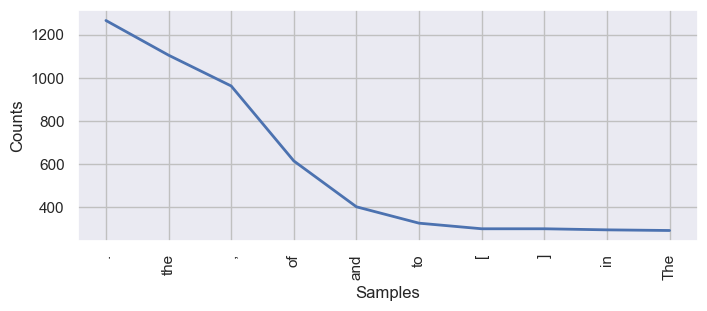

In [20]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Stopwords

In [22]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'am', "haven't", 'were', 'm', 'do', 'being', 'against', 'isn', 'y', 'in', 'itself', "weren't", 'can', 'why', 'and', 'whom', "needn't", 'his', 'but', 'up', 'weren', 'them', 'few', "isn't", 'll', "won't", 'he', 'myself', 'into', 'own', 'wouldn', 'their', 'had', 'all', 'down', 'who', 'then', 'by', 'it', 'wasn', 'which', 'have', 'here', 'o', 'over', "you'd", 'because', 'any', 'than', 'or', 'what', 'is', 'yourselves', 'just', "aren't", 'did', 'during', 'so', 'you', 'him', 'ain', 'before', 'once', 'a', 'our', 'needn', "you're", 'its', 'this', 'doing', "doesn't", 'her', 'hers', 'on', 'yours', 'most', "you'll", 'each', 'the', 'there', "hasn't", 'ours', 'same', 'hasn', 'my', 'didn', 'they', 'too', 'some', 'won', 'when', 'aren', 'while', 'again', 'to', 'above', 'd', 've', 'after', 'himself', 'further', 'doesn', "shouldn't", 'out', 't', "don't", 'other', 'will', "that'll", 'about', 'both', 'yourself', 'she', 'not', 'be', 'herself', 'very', 'nor', 'below', "wasn't", 'are', 're', "mightn't", 'only

In [23]:
# Removing stopwords in sentences

# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [24]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [25]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1World',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2Russian',
 'Revolution',
 'communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '

In [26]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4697 samples and 16349 outcomes>


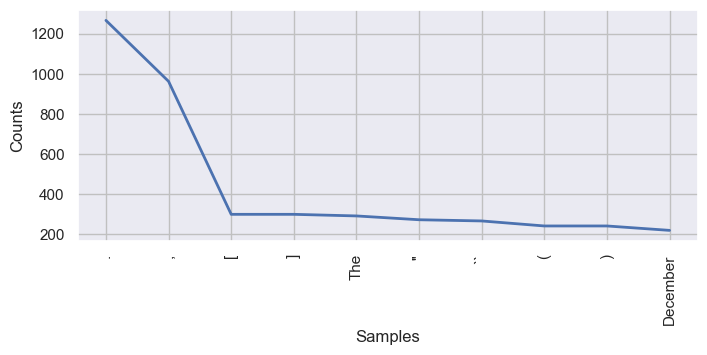

In [27]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [28]:
dist_words_filter

FreqDist({'.': 1267, ',': 963, '[': 300, ']': 300, 'The': 292, "''": 273, '``': 267, '(': 242, ')': 242, 'December': 220, ...})

In [29]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [30]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchAppearanceDonateCreate    accountLog    inPersonal    toolsDonate    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   World    beginning    century               The    war    end    wars               World    War    I                                          Russian    Revolution    communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                          The    war    Europe     Blitzkrieg     Ope

In [31]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Ja

In [32]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

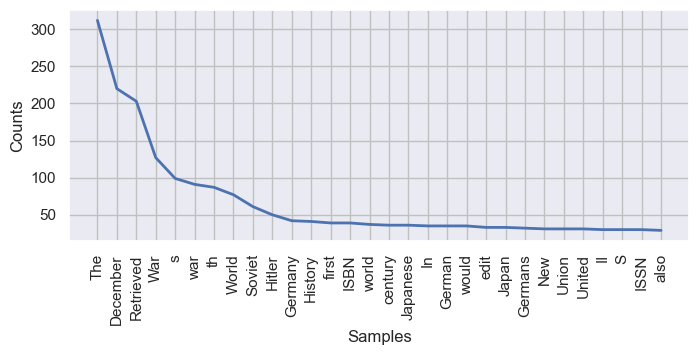

In [33]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

### Finally after getting rid of unnecessary punctuations and stop words, we can reach to the real word data with this skimmed text.

In [35]:
dist_words_filter_2.most_common(20)

[('The', 312),
 ('December', 220),
 ('Retrieved', 203),
 ('War', 127),
 ('s', 99),
 ('war', 91),
 ('th', 87),
 ('World', 77),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 42),
 ('History', 41),
 ('first', 39),
 ('ISBN', 39),
 ('world', 37),
 ('century', 36),
 ('Japanese', 36),
 ('In', 35),
 ('German', 35),
 ('would', 35)]

## POS Tags with TextBlob

In [37]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [38]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [39]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 15.6 ms
Wall time: 16 ms


In [40]:
text

TextBlob("['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansio

In [41]:
tags_list = text.tags

In [42]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchAppearanceDonateCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsDonate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'PO

In [43]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [44]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [45]:
df_t = df_text.groupby('Word type').count().reset_index()

In [46]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,76
2,DT,12
3,EX,12
4,FW,43


### Top 10 POS tags

In [48]:
top10 = df_t.nlargest(10, 'Words')

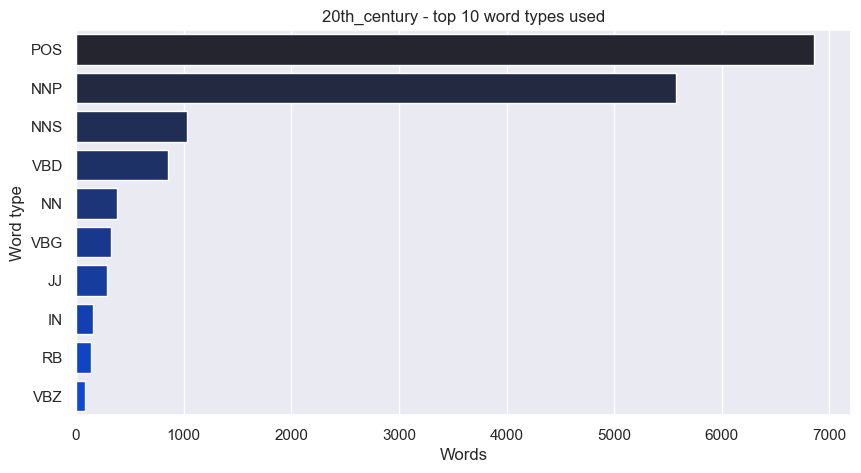

In [49]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th_century - top 10 word types used")

In [50]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top10=y.nlargest(10, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

### Nouns

In [52]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [53]:
top15

,Word,Occurences
288,'December,220
1252,'War,127
2582,'war,91
2502,'th,87
1302,'World,77
1104,'Soviet,61
536,'Hitler,50
535,'History,41
561,'ISBN,39
1776,'first,39


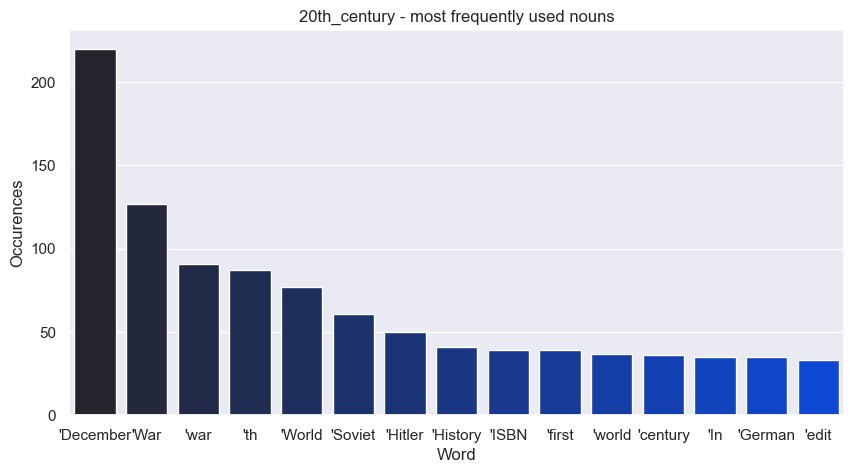

In [54]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th_century - most frequently used nouns")

### Verbs

In [56]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [57]:
top15

,Word,Occurences
27,'Retrieved,203
36,'United,31
0,'Allied,19
194,'led,15
318,'used,13
192,'launched,12
1,'Archived,10
92,'controlled,9
159,'forced,8
76,'changed,7


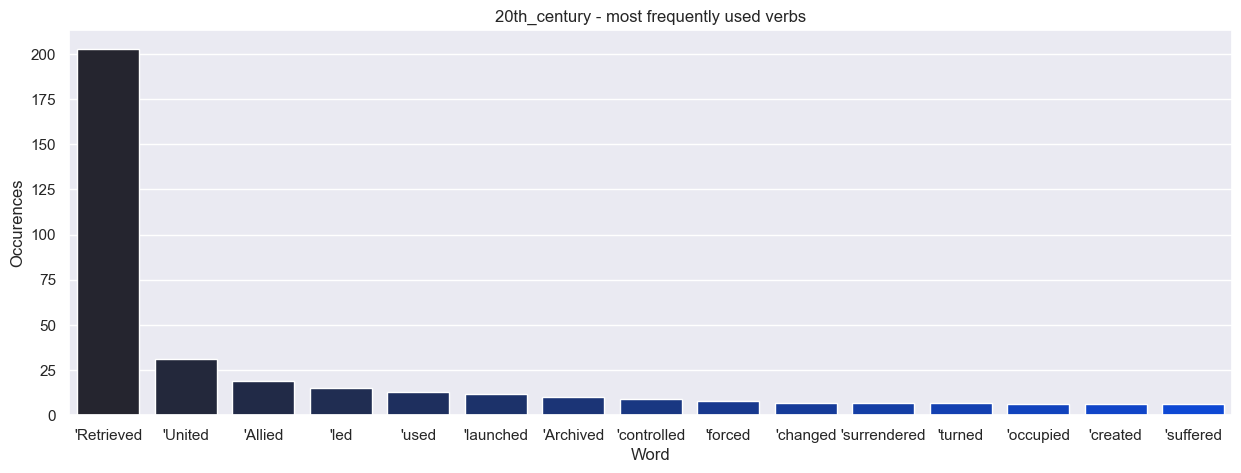

In [58]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("20th_century - most frequently used verbs")
    

### Adjectives

In [60]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [61]:
top15

,Word,Occurences
26,'Japanese,36
2,'American,24
5,'Atlantic,13
19,'Guardian,10
13,'Chinese,7
41,'Russian,7
102,'political,6
1,'African,6
7,'Baltic,5
103,'possible,5


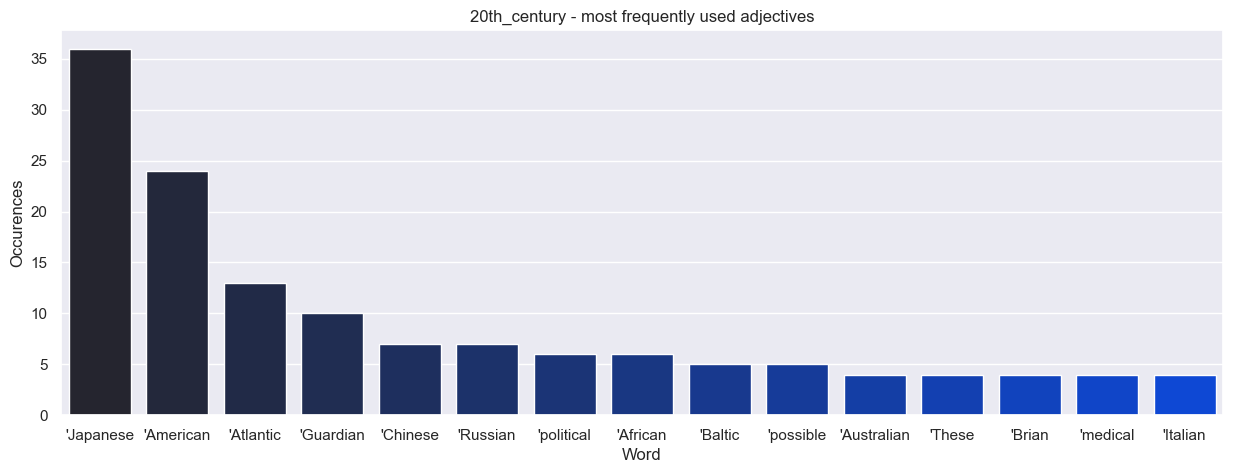

In [62]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("20th_century - most frequently used adjectives")

## Number of times countries are mentioned in the text

In [64]:
import pandas as pd
import re

# Load the country list from CSV
countries_df = pd.read_csv("countries_list_20th_century_1.5.csv")

# ✅ Ensure the column name is correct and clean the data
countries_list = countries_df["country_name"].dropna().astype(str).str.strip().tolist()  # Convert to string & remove spaces

# ✅ Debug: Print first 10 country names to check format
print("Sample of country list:", countries_list[:10])

# Read the Wikipedia script
with open("20th_century.txt", "r", encoding="utf-8") as file:
    text = file.read().lower()  # Convert text to lowercase

# ✅ Debug: Print first 500 characters of text to check
print("Sample of cleaned text:\n", text[:500])

# ✅ Count occurrences of each country in the text
country_counts = {}

for country in countries_list:
    country_lower = country.lower()  # Convert country name to lowercase
    pattern = rf"\b{re.escape(country_lower)}\b"  # Exact match with word boundaries
    count = len(re.findall(pattern, text))  # Count occurrences
    
    if count > 0:  # Only store if found
        country_counts[country] = count

# Convert to DataFrame
result_df = pd.DataFrame(list(country_counts.items()), columns=["Country", "Mentions"])

# ✅ Save the results to a CSV file
result_df.to_csv("country_mentions_20th_century.csv", index=False)

# ✅ Print the top 10 mentioned countries
print(result_df.sort_values(by="Mentions", ascending=False).head(10))


Sample of country list: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria']
Sample of cleaned text:
 



key events of the 20th century - wikipedia



























jump to content







main menu





main menu
move to sidebar
hide



		navigation
	


main pagecontentscurrent eventsrandom articleabout wikipediacontact us





		contribute
	


helplearn to editcommunity portalrecent changesupload file



















search











search






















appearance
















donate

create account

log in








personal tools





donate create account log in





          Country  Mentions
19        Germany        42
30          Japan        33
62  United States        23
18         France        17
29          Italy        14
63        Vietnam        13
48         Poland        13
50         Russia         9
25          India         9
43         Norway         5


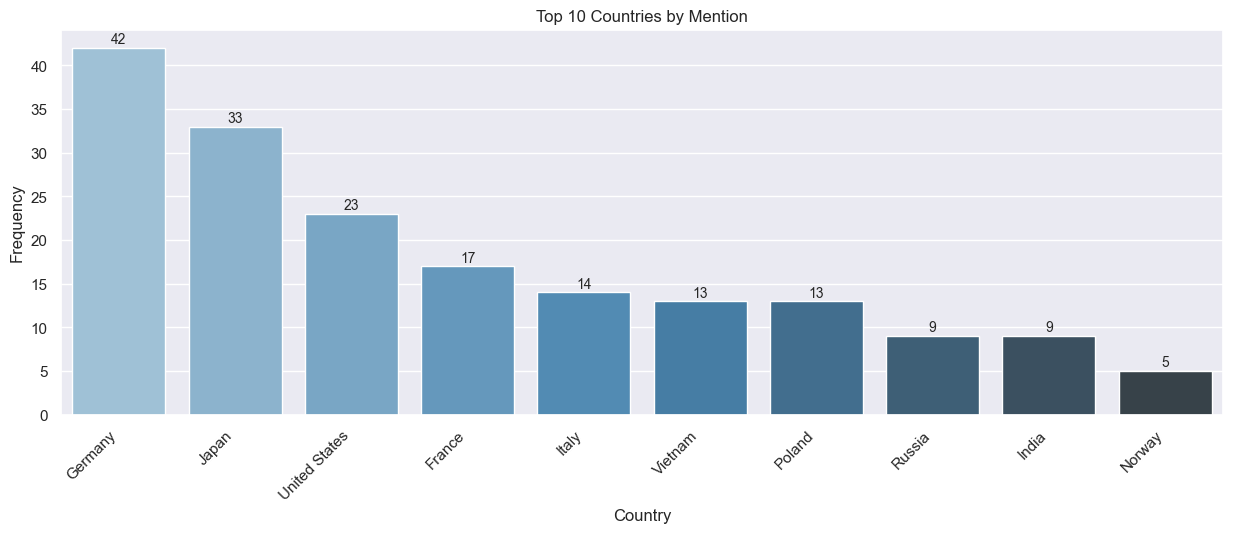

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Ensure the DataFrame is sorted in descending order
country_ord = result_df.sort_values(by="Mentions", ascending=False)

# ✅ Only keep top 10 countries (adjust if needed)
top_countries = country_ord.head(10)  

# ✅ Check if multiple countries exist before plotting
if top_countries.shape[0] < 2:
    print("Not enough data to plot multiple countries.")
else:
    # ✅ Plot frequency of countries
    plt.figure(figsize=(15, 5))
    sns.barplot(x="Country", y="Mentions", data=top_countries, palette="Blues_d")

    # ✅ Add frequency labels above bars
    for index, row in enumerate(top_countries.itertuples()):
        plt.text(index, row.Mentions + 0.5, str(row.Mentions), ha="center", fontsize=10)

    # ✅ Customize the plot
    plt.title("Top 10 Countries by Mention")
    plt.xlabel("Country")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

    # ✅ Show the plot
    plt.show()


The countries mostly mentioned are second world war countries.


### Sentiment Analysis

In [68]:
# Determine Sentiment of the text
text_sent = TextBlob(str(filtered))

In [69]:
print(text_sent.sentiment)

Sentiment(polarity=0.048415795362829195, subjectivity=0.35485689240138346)


Sentiment(polarity=0.05106263171509207, subjectivity=0.3515626135727184)
The text in a sentimental aspect is neither positive nor negative and for the subjectivity it is more of a factual information than personal opinions.